# Object Detection

Object detection is the task of identifying and locating specific objects within digital images or video frames. It has far-reaching implications across diverse sectors, including self-driving cars, facial recognition systems, and medical diagnosis tools.

Classification distinguishes objects based on unique attributes, while localization determines an object’s location within an image. Object detection combines both approaches, locating entities and assigning corresponding class labels. Imagine recognizing different fruit types and pinpointing their exact locations in a single image. That’s object detection at play!



In [1]:
!pip install -q timm

In [6]:
from transformers import pipeline
from PIL import Image, ImageDraw
import requests

pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

image = Image.open(requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCd_wxF_1L1I9Za7R0qPK3JCr_ZyV5pPONUw&s", stream=True).raw).convert("RGB")

bounding_boxes = pipe(image)
bounding_boxes

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.9738054871559143,
  'label': 'truck',
  'box': {'xmin': 44, 'ymin': 98, 'xmax': 70, 'ymax': 111}},
 {'score': 0.7868772745132446,
  'label': 'truck',
  'box': {'xmin': 72, 'ymin': 63, 'xmax': 84, 'ymax': 76}},
 {'score': 0.9967215657234192,
  'label': 'person',
  'box': {'xmin': 228, 'ymin': 24, 'xmax': 257, 'ymax': 116}},
 {'score': 0.7713261842727661,
  'label': 'car',
  'box': {'xmin': 136, 'ymin': 37, 'xmax': 154, 'ymax': 49}},
 {'score': 0.7877969741821289,
  'label': 'car',
  'box': {'xmin': 71, 'ymin': 63, 'xmax': 83, 'ymax': 75}},
 {'score': 0.9685362577438354,
  'label': 'person',
  'box': {'xmin': 206, 'ymin': 23, 'xmax': 227, 'ymax': 48}},
 {'score': 0.923561155796051,
  'label': 'car',
  'box': {'xmin': 44, 'ymin': 98, 'xmax': 70, 'ymax': 111}},
 {'score': 0.9996758699417114,
  'label': 'person',
  'box': {'xmin': 93, 'ymin': 7, 'xmax': 141, 'ymax': 167}},
 {'score': 0.999093770980835,
  'label': 'person',
  'box': {'xmin': 154, 'ymin': 26, 'xmax': 191, 'ymax':

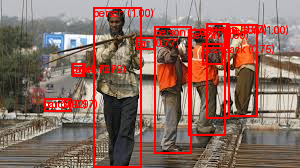

In [10]:
draw = ImageDraw.Draw(image)

for box in bounding_boxes:
    box_coordinates = box['box']
    draw.rectangle(
        [box_coordinates['xmin'], box_coordinates['ymin'], box_coordinates['xmax'], box_coordinates['ymax']],
        outline="red", width=2
    )
    draw.text((box_coordinates['xmin'], box_coordinates['ymin']), f"{box['label']} ({box['score']:.2f})", fill="red")

image

### how to evaluate?

1. **Intersection over Union (IoU)**: This metric measures the overlap between predicted and reference labels, expressed as a percentage from 0% to 100%. A higher IoU indicates better alignment and accuracy. It is particularly useful for assessing tracker performance in dynamic conditions, such as tracking wild animals during migration.

2. **Mean Average Precision (mAP)**: This metric assesses object detection efficiency by combining precision (the ratio of correct predictions) and recall (the ability to identify true positives). mAP is calculated across varying IoU thresholds, providing a comprehensive evaluation of the model's localization and detection performance, especially in challenging scenarios like identifying irregular surface defects in manufactured parts.

other must readings
- https://huggingface.co/docs/transformers/tasks/object_detection

# Image segmentation

Image segmentation is dividing an image into meaningful segments. It’s all about creating masks that spotlight each object in the picture. The intuition behind this task is that it can be viewed as a classification for each pixel of the image. Segmentation models are the core models in various industries. They can be found in agriculture and autonomous driving. In the farming world, these models are used for identifying different land sections and assessing the growth stage of crops. They’re also key players for self-driving cars, where they are used to identify lanes, sidewalks, and other road users.

Different types of segmentations can be applied depending on the context and the intended goal. The most commonly defined segmentations are the following.

- **Semantic Segmentation:** This involves assigning the most probable class to each pixel. For example, in semantic segmentation, the model does not distinguish between two individual cats but rather focuses on the pixel class. It’s all about classification of each pixel.
- **Instance Segmentation:** This type involves identifying each instance of an object with a unique mask. It combines aspects of object detection and segmentation to differentiate between individual objects of the same class.
- **Panoptic Segmentation:** A hybrid approach that combines elements of semantic and instance segmentation. It assigns a class and an instance to each pixel, effectively integrating the what and where aspects of the image.

![](https://huggingface.co/datasets/hf-vision/course-assets/resolve/main/segmentation-types.png)

## new approach

U-Net is a well-known network for image segmentation that operates in two main phases: downsampling, which compresses the image to extract features, and upsampling, which restores the image to its original size for detailed segmentation. While convolutional models were dominant in computer vision, the field is shifting towards vision transformers. A notable example is the Segment Anything Model (SAM), introduced by Meta AI Research in April 2023. SAM is a prompt-based segmentation model built on the Vision Transformer (ViT) architecture, allowing users to describe what to segment in an image. Its effectiveness stems from being trained on a vast dataset of over 1 billion masks across 11 million images. Users can explore Meta's demo or interact with the model in transformers for practical experience.

In [3]:
from transformers import pipeline
from PIL import Image
import requests
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = pipeline("mask-generation", model="facebook/sam-vit-base", device=device)

raw_image = Image.open(requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCd_wxF_1L1I9Za7R0qPK3JCr_ZyV5pPONUw&s", stream=True).raw).convert("RGB")

masks = pipe(raw_image)
masks

{'masks': [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True]]),
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, 

In [13]:
!pip install -q matplotlib

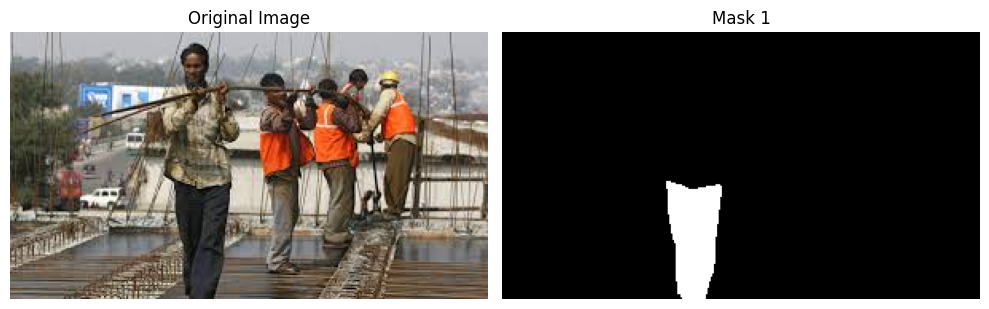

In [16]:
import matplotlib.pyplot as plt
from transformers import pipeline
from PIL import Image
import requests
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = pipeline("mask-generation", model="facebook/sam-vit-base", device=device)

raw_image = Image.open(requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCd_wxF_1L1I9Za7R0qPK3JCr_ZyV5pPONUw&s", stream=True).raw).convert("RGB")

masks = pipe(raw_image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(raw_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(masks['masks'][5], cmap='gray')
axs[1].set_title('Mask 5')
axs[1].axis('off')

plt.tight_layout()
plt.show()


### how to evaluate?

You have now seen how to use a segmentation model, but how can you evaluate it? As demonstrated in the previous section, segmentation is primarily a supervised learning task. This means that the dataset is composed of images and their corresponding masks, which serve as the ground truth. A few metrics can be used to evaluate your model. The most common ones are:

- **The Intersection over Union (IoU) or Jaccard index metric** is the ratio between the intersection and the union of the predicted mask and the ground truth. IoU is arguably the most common metric used in segmentation tasks. Its advantage lies in being less sensitive to class imbalance, making it often a good choice when you begin modeling.
IoU

![](https://huggingface.co/datasets/hf-vision/course-assets/resolve/main/iou.png)

- **Pixel accuracy:** Pixel accuracy is calculated as the ratio of the number of correctly classified pixels to the total number of pixels. While being an intuitive metric, it can be misleading due to its sensitivity to class imbalance.

![](https://huggingface.co/datasets/hf-vision/course-assets/resolve/main/pixel-accuracy.png)

- **Dice coefficient:** It’s the ratio between the double of the intersection and the sum of the predicted mask and the ground truth. The dice coefficient is simply the percentage of overlap between the prediction and the ground truth. It’s a good metric to use when you need sensibility to small differences between the overlap.
Dice coefficient

![](https://huggingface.co/datasets/hf-vision/course-assets/resolve/main/dice-coefficient.png)

other must readings:
- https://arxiv.org/abs/2304.02643 (SAM)
- https://huggingface.co/blog/fine-tune-segformer
- https://huggingface.co/docs/transformers/main/tasks/semantic_segmentation